In [27]:
# IMPORTS
import pandas as pd
import matplotlib.pyplot as plt
import random
from faker import Faker
import os

In [28]:
if not os.path.exists("./Data/transactions_data.csv"):
    # Creating fake data to work with Faker library
    fake = Faker()

    # Create a DF of fake e-commerce transactions
    num_transactions = 10000

    clients = [fake.name() for _ in range(num_transactions // 3)]
    products_names = ['Produto A', 'Produto B', 'Produto C', 'Produto D', 'Produto E', 'Produto F', None]
    categories = ['Pizzas', 'Lanches', 'Refrigerantes', "Marmitas"]

    # products = [{'Product_ID': i,
    #         'Name': random.choice(products_names),
    #         'Category': random.choice(categories),
    #         'UnitPrice': round(random.uniform(10, 100), 2)} for i in range(len(products_names))]

    # Generate transactions
    data = [{'Transaction_ID': i,
            'Date': fake.date_time_this_decade(),
            'Client': random.choice(clients),
            'Product': random.choice(products_names),
            'Category': random.choice(categories),
            'Quantity': random.randint(1, 5),
            'UnitPrice': round(random.uniform(10, 100), 2)} for i in range(num_transactions)]

    transactions_data = pd.DataFrame(data)

    # Export transactions to csv 
    transactions_data.to_csv("./Data/transactions_data.csv", index=False)
    
    del(fake)
    del(num_transactions)
    del(products_names)
    del(categories)
    del(data)
    del(transactions_data)


### Extraction

In [29]:
transactions = pd.read_csv("./Data/transactions_data.csv")

transactions.describe(include='all')

,Transaction_ID,Date,Client,Product,Category,Quantity,UnitPrice
count,10000.00000,10000,10000,8569,10000,10000.000000,10000.000000
unique,NaN,10000,3094,6,4,NaN,NaN
top,NaN,2020-03-13 23:09:57,David Brown,Produto E,Pizzas,NaN,NaN
freq,NaN,1,17,1494,2522,NaN,NaN
mean,4999.50000,NaN,NaN,NaN,NaN,2.987300,55.176088
std,2886.89568,NaN,NaN,NaN,NaN,1.414758,26.030706
min,0.00000,NaN,NaN,NaN,NaN,1.000000,10.010000
25%,2499.75000,NaN,NaN,NaN,NaN,2.000000,32.827500
50%,4999.50000,NaN,NaN,NaN,NaN,3.000000,55.255000
75%,7499.25000,NaN,NaN,NaN,NaN,4.000000,78.055000


### Transformation

In [30]:
# Remove NaN values
transactions.dropna()

# Transform date column to datetime
transactions['Date'] = pd.to_datetime(transactions['Date'])

# Transform category column to type category
transactions['Category'] = transactions['Category'].astype('category')

# Transform product column to type category
transactions['Product'] = transactions['Product'].astype('category')

# Create Income series
transactions['Income'] = transactions['Quantity'] * transactions['UnitPrice']



In [31]:
# Group transactions by Products and Category
products = transactions.groupby(['Product', 'Category'], observed=False)

most_sold_products = products['Quantity'].sum().sort_values(ascending=False).head(10)
most_sold_products.name = "most_sold_products"

income_by_category = transactions.groupby('Category', observed=False)['Income'].sum()
income_by_category.name = "income_by_category"




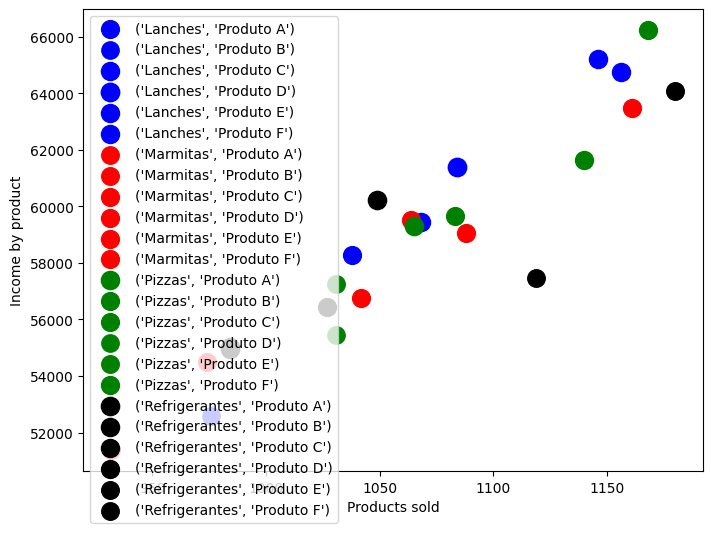

In [53]:
data = pd.DataFrame({"income_by_product"    : products['Income'].sum(),
                     "products_sold"        : products["Quantity"].sum(),
                     "max_income"           : products["Income"].max(), 
                     "mean_ticket"          : products['Income'].mean().round(2),
                     "min_income"           : products["Income"].min()}).sort_values('income_by_product', ascending=False)
plt.figure(figsize=(8, 6))

colors = {'Lanches': 'blue', 'Pizzas': 'green', 'Marmitas' : 'red', 'Refrigerantes' : 'black'}

for category, group in data.groupby(['Category', 'Product'], observed=False):
    plt.scatter(group['products_sold'], group['income_by_product'], group['mean_ticket'], label=category, color=colors[category[0]])

plt.xlabel('Products sold')
plt.ylabel('Income by product')
plt.title('')
plt.legend()
plt.show()

# data.plot.scatter(x='income_by_product', y='products_sold', s='mean_ticket', c= 'red')

In [ ]:
data

income_by_product  products_sold  max_income  \
Product   Category                                                      
Produto B Pizzas                  66231.26           1168      498.50   
Produto C Lanches                 65227.01           1146      497.05   
Produto F Lanches                 64761.06           1156      491.95   
Produto E Refrigerantes           64076.92           1180      489.00   
          Marmitas                63485.13           1161      500.00   
Produto F Pizzas                  61628.44           1140      498.90   
Produto D Lanches                 61401.89           1084      495.00   
Produto A Refrigerantes           60220.49           1049      496.25   
Produto C Pizzas                  59649.52           1083      486.85   
Produto D Marmitas                59531.97           1064      497.30   
Produto E Lanches                 59459.77           1068      492.15   
Produto A Pizzas                  59313.32           1065      485.25   
Produto C Marmitas                59063.90           1088      498.20   
Produto A Lanches                 58289.78           1038      497.35   
Produto F Refrigerantes           57469.56           1119      491.75   
Produto E Pizzas                  57241.99           1031      497.30   
Produto F Marmitas                56759.61           1042      493.35   
Produto D Refrigerantes           56438.86           1027      485.85   
          Pizzas                  55441.87           1031      476.00   
Produto C Refrigerantes           55016.27            984      499.70   
Produto B Refrigerantes           54965.82            984      491.65   
          Marmitas                54483.59            974      497.65   
          Lanches                 52590.79            976      497.80   
Produto A Marmitas                51376.37            932      489.10   

                         mean_ticket  min_income  
Product   Category                                
Produto B Pizzas              165.17       10.12  
Produto C Lanches             169.42       11.08  
Produto F Lanches             169.09       12.61  
Produto E Refrigerantes       160.59       10.82  
          Marmitas            165.33       10.82  
Produto F Pizzas              166.56       10.33  
Produto D Lanches             175.94       10.42  
Produto A Refrigerantes       172.55       12.39  
Produto C Pizzas              163.87       10.29  
Produto D Marmitas            164.91       10.61  
Produto E Lanches             168.92       10.85  
Produto A Pizzas              171.92       10.48  
Produto C Marmitas            164.52       10.49  
Produto A Lanches             164.20       10.39  
Produto F Refrigerantes       158.76       10.64  
Produto E Pizzas              159.45       10.06  
Produto F Marmitas            164.05       10.32  
Produto D Refrigerantes       165.51       11.86  
          Pizzas              156.17       11.62  
Produto C Refrigerantes       168.76       11.22  
Produto B Refrigerantes       170.17       10.34  
          Marmitas            160.25       11.87  
          Lanches             156.06       10.68  
Produto A Marmitas            158.57       11.02